Form (rækker, kolonner): (7043, 21)

Kolonner og datatyper:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Første 5 rækker:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Churn fordeling:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


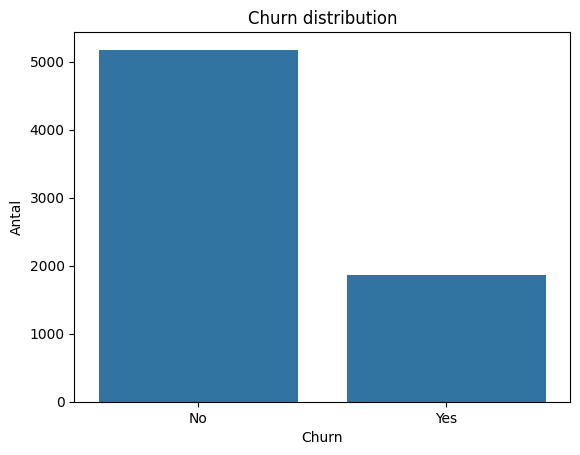

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Indlæs datasættet
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Grundlæggende info
print("Form (rækker, kolonner):", df.shape)
print("\nKolonner og datatyper:")
print(df.dtypes)

# Første 5 rækker
print("\nFørste 5 rækker:")
display(df.head())

# Churn-fordeling 
print("\nChurn fordeling:")
print(df['Churn'].value_counts())

# Visualisering af churn-fordeling
sns.countplot(data=df, x='Churn')
plt.title('Churn distribution')
plt.xlabel('Churn')
plt.ylabel('Antal')
plt.show()


In [61]:
# Konverter TotalCharges til numerisk først
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Tjek for manglende værdier efter konvertering
print("Antal tomme TotalCharges:", df['TotalCharges'].isnull().sum())


Antal tomme TotalCharges: 11


In [62]:
df = df[df['TotalCharges'].notna()]


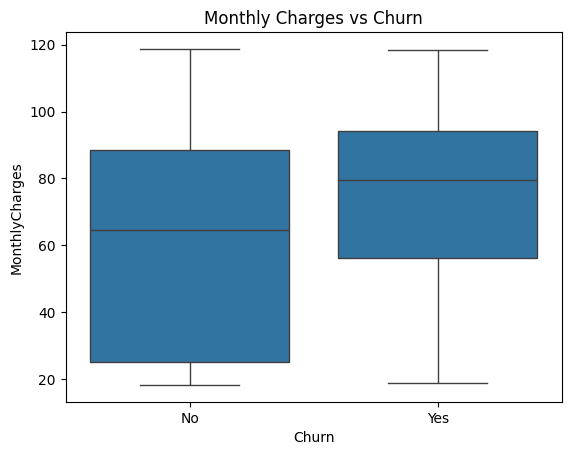

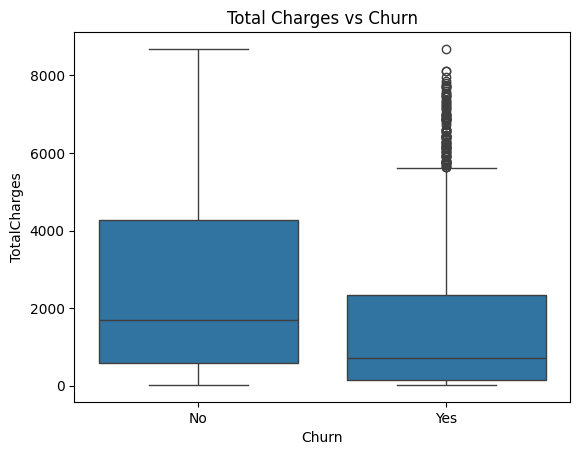

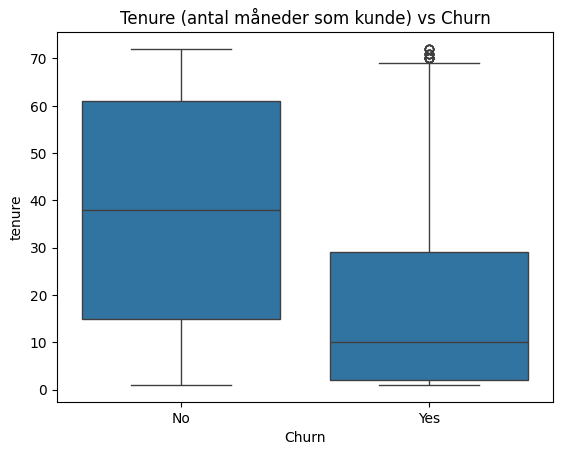

In [63]:
# Boxplot: Sammenlign MonthlyCharges mellem churn og ikke-churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

# Boxplot: TotalCharges vs Churn
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charges vs Churn')
plt.show()

# Boxplot: Tenure vs Churn
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure (antal måneder som kunde) vs Churn')
plt.show()


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# original datasæt kopi
df_model = df.drop(['customerID'], axis=1).copy()

# Konverter Churn til binær (0/1)
df_model['Churn'] = df_model['Churn'].map({'No': 0, 'Yes': 1})

# Konverter kategoriske kolonner til numeriske med one-hot encoding
df_model = pd.get_dummies(df_model)

# Standardiser numeriske kolonner
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

# Split i features og labels
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Split data i træning og test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bekræft
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (5625, 45)
X_test shape: (1407, 45)


Accuracy: 0.7882

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



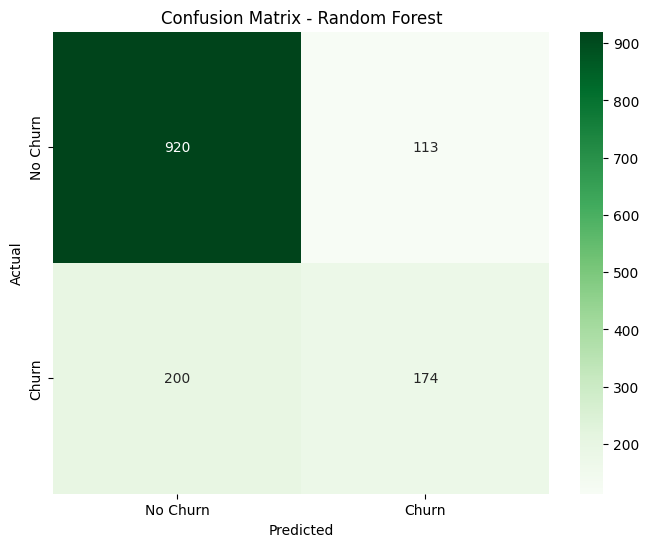

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Initialisér og træn modellen
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Forudsig på testdata
y_pred = model.predict(X_test)

# Evaluer model
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

#  gem billede
os.makedirs("notebooks", exist_ok=True)
plt.savefig("notebooks/confusion_matrix.png")

# Vi i notebooken
plt.show()

Random Forest Accuracy: 0.7775

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



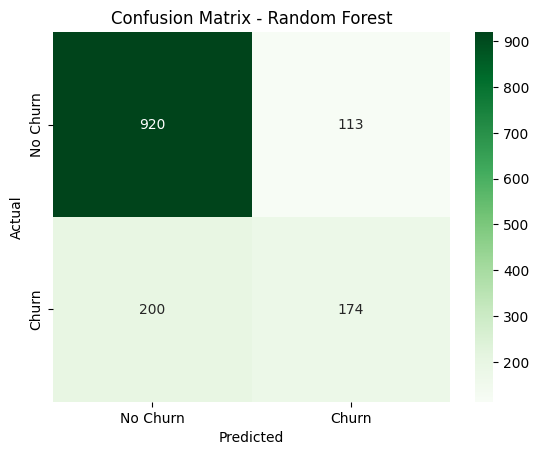

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialisér og træn Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Forudsig på testdata
y_pred_rf = rf_model.predict(X_test)

# Evaluer model
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [67]:
# Vis fordelingen af Churn i procent
churn_dist = df['Churn'].value_counts(normalize=True) * 100
print("Churn distribution (%):")
print(churn_dist)


Churn distribution (%):
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


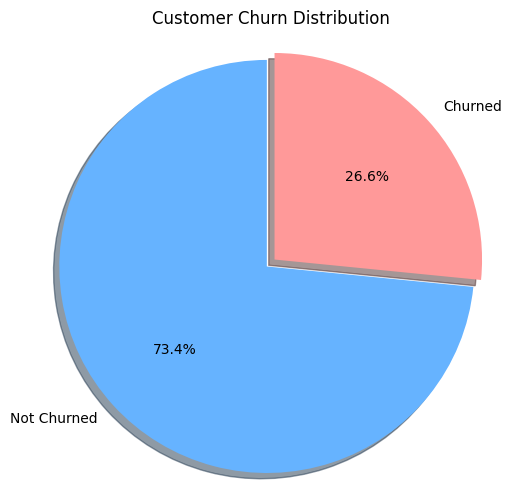

In [68]:
import matplotlib.pyplot as plt

# Beregn churn-fordeling i procent
churn_counts = df['Churn'].value_counts()
labels = ['Not Churned', 'Churned']
colors = ['#66b3ff', '#ff9999']

# Lav pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.05), shadow=True)
plt.title('Customer Churn Distribution')
plt.axis('equal')  
plt.show()
